<a href="https://colab.research.google.com/github/VictorOPreuss/aceleradev_ds/blob/master/desafios/desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [0]:
#from google.colab import files

#uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)
from sklearn.preprocessing import (KBinsDiscretizer, 
                                   OneHotEncoder, StandardScaler)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_20newsgroups

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [0]:
countries = pd.read_csv("countries.csv")

In [5]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [0]:
countries['Country'] = countries['Country'].str.strip() # excluindo espaços em branco da coluna Country
countries['Region'] = countries['Region'].str.strip() # excluindo espaços em branco da coluna Region

In [0]:
def str_to_num(df): # função para transformar as colunas numéricas de str para float ou int

  df_new = []

  for col in df:
    df_replace_comma = df[col].astype(str).str.replace(',', '.')
    df_replace_nan = df_replace_comma.astype(str).replace('nan', np.nan)
    df_new.append(df_replace_nan)

  return pd.DataFrame(df_new).T

In [9]:
df = str_to_num(countries)
df_col = df.columns.drop(['Country', 'Region'])
df_cat = df[['Country', 'Region']]
df_num = df[df_col].astype(float)
df_final = pd.concat([df_cat, df_num], axis = 1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    float64
 3   Area              227 non-null    float64
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [10]:
def q1():
    # Retorne aqui o resultado da questão 1.
    
    regions = countries['Region']
    regions_unique = np.sort(regions.unique()).tolist() # filtrando apenas os valores únicos da coluna Region

    return regions_unique
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.

    pop_density = df_final['Pop_density']
    pop_density_df = pd.DataFrame(pop_density)
    
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    discretizer.fit(pop_density_df)
    score_bins = discretizer.transform(pop_density_df)
    df_q2 = df_final.copy()
    df_q2['score_bins'] = score_bins
    df_q2_90 = df_q2[df_q2['score_bins'] >= 9]['Country']
    df_q2_90_counts = df_q2_90.value_counts().sum()

    return df_q2_90_counts.item()
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [12]:
def q3():
    # Retorne aqui o resultado da questão 3.

    get_dummies = pd.get_dummies(countries[['Region', 'Climate']].fillna('NaN'))

    result = int(get_dummies.shape[1])
    
    return result
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

Passando as colunas para numéricos, preenchendo os NaN com as respectivas medianas das colunas

Padronização das variáveis numéricas

In [0]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [14]:
row_test_country = pd.DataFrame([test_country], columns = new_column_names)
row_test_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           1 non-null      object 
 1   Region            1 non-null      object 
 2   Population        1 non-null      float64
 3   Area              1 non-null      float64
 4   Pop_density       1 non-null      float64
 5   Coastline_ratio   1 non-null      float64
 6   Net_migration     1 non-null      float64
 7   Infant_mortality  1 non-null      float64
 8   GDP               1 non-null      float64
 9   Literacy          1 non-null      float64
 10  Phones_per_1000   1 non-null      float64
 11  Arable            1 non-null      float64
 12  Crops             1 non-null      float64
 13  Other             1 non-null      float64
 14  Climate           1 non-null      float64
 15  Birthrate         1 non-null      float64
 16  Deathrate         1 non-null      float64
 17  A

In [15]:
 def q4():
    # Retorne aqui o resultado da questão 4.
    
    num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())])    
    
    test_country_num = row_test_country.drop(['Country', 'Region'], axis = 1)

    test_country_cat = row_test_country[['Country', 'Region']]

    df_num_fit = num_pipeline.fit(df_num)

    test_cty_transf = num_pipeline.transform(test_country_num)

    test_cty_transf_df = pd.DataFrame(test_cty_transf, columns = df_num.columns)

    result = float(test_cty_transf_df['Arable'].round(3))

    return result
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [16]:
net_migration = df_final['Net_migration']
net_migration.head()

0    23.06
1    -4.93
2    -0.39
3   -20.71
4     6.60
Name: Net_migration, dtype: float64

In [17]:
quantile_1 = net_migration.quantile(0.25)
quantile_3 = net_migration.quantile(0.75)
iqr = quantile_3 - quantile_1

non_outlier_interval_iqr = [quantile_1 - 1.5 * iqr, quantile_3 + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}")

Faixa considerada "normal": [-3.8149999999999995, 3.885]


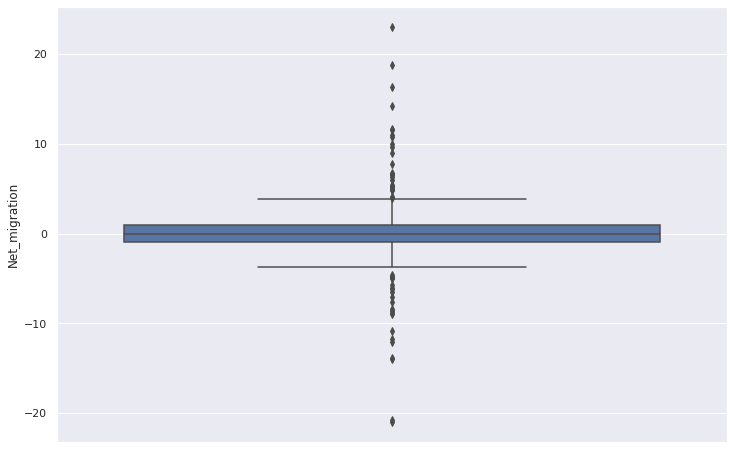

In [18]:
sns.boxplot(net_migration, orient="vertical");

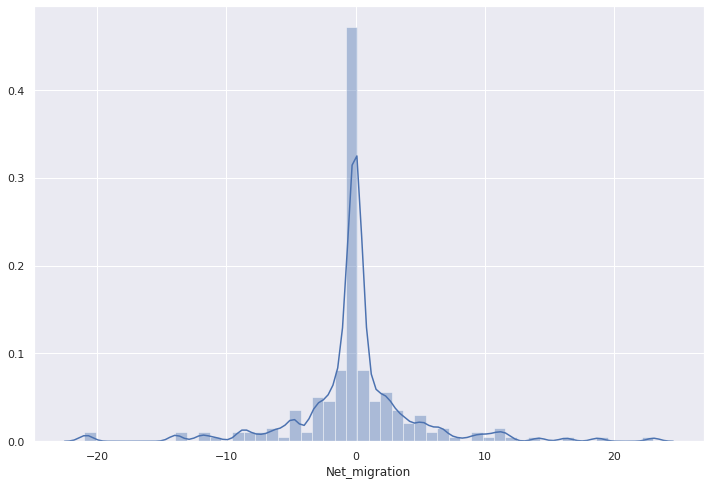

In [19]:
sns.distplot(net_migration)

In [20]:
def q5():
    # Retorne aqui o resultado da questão 5.

    outliers_iqr_lower = (net_migration < non_outlier_interval_iqr[0]).sum().item()

    outliers_iqr_higher = (net_migration > non_outlier_interval_iqr[1]).sum().item()

    result = []

    result.extend([outliers_iqr_lower, outliers_iqr_higher, False])

    return tuple(result)
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [0]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

count_vectorizer = CountVectorizer()

In [22]:
def q6():
    # Retorne aqui o resultado da questão 6.

    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
    words_idx = sorted([count_vectorizer.vocabulary_.get(f"{word.lower()}") for word in
                    [u"phone"]])
    

    return newsgroups_counts[:, words_idx].toarray().sum().item()
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [23]:
def q7():
    # Retorne aqui o resultado da questão 7.

    tfidf_vectorizer = TfidfVectorizer()

    newsgroups_tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroups.data)

    words_idx = sorted([count_vectorizer.vocabulary_.get(f"{word.lower()}") for word in
                    [u"phone"]])

    return round(newsgroups_tfidf_vectorized[:, words_idx].toarray().sum(), 3).item()
q7()

8.888